1. Гистограммы. Выбрать произвольное слабоконтрастное изображение. Выполнить выравнивание гистограммы и растяжение контраста, использовать рассмотренные преобразования и встроенные функции. Сравнить полученные результаты.
2. Проекции. Выбрать произвольное изображение, содержащее монотонные области и выделяющиеся объекты. Произвести построение проекций изображения на вертикальную оси.
3. Профили. Выбрать произвольное изображение, содержащие штрих-код. Выполнить построение профиля изображения вдоль штрих-кода.


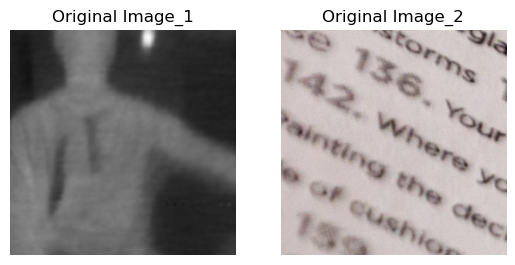

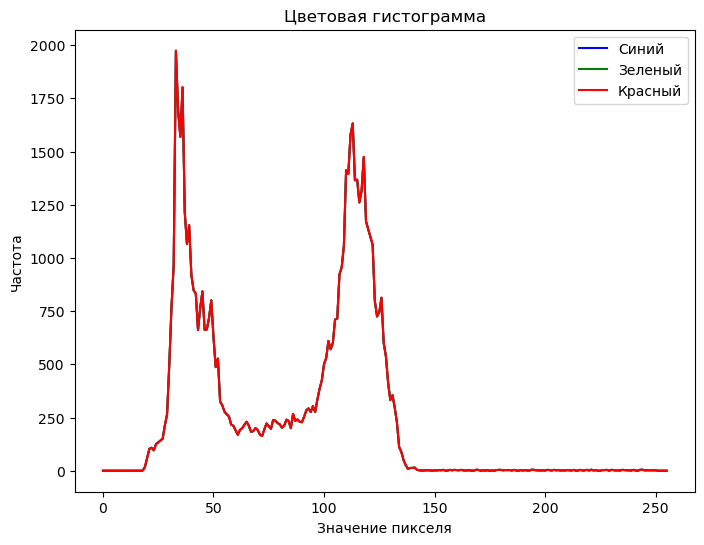

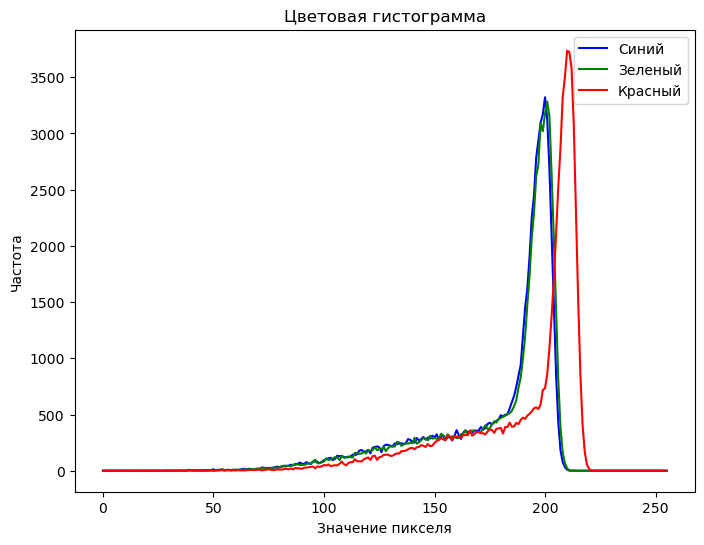

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Гистограммы


# отображение исходных изображений
image_path_1 = "C:\\Users\\vs410\\Downloads\\l_contrast.png" #низкоконтрастное изображение с детектора
img = cv2.imread(image_path_1)
roi = img[100:500, 100:500]
image_1 = cv2.resize(roi, (256, 256))



image_path_2 = "C:\\Users\\vs410\\Downloads\\l_contrast2.png" #текст
im = cv2.imread(image_path_2)
roi = im[100:500, 100:500]
image_2 = cv2.resize(roi, (256, 256))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image_1')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image_2')



# Построение гистограммы
def make_histogram(image):
    hist_size = 256
    hist_range = (0, 256)

    im_BGR = cv2.split(image)
    b_hist = cv2.calcHist([im_BGR[0]], [0], None, [hist_size], hist_range)
    g_hist = cv2.calcHist([im_BGR[1]], [0], None, [hist_size], hist_range)
    r_hist = cv2.calcHist([im_BGR[2]], [0], None, [hist_size], hist_range)

    # Построение гистограммы для каждого цветового канала
    plt.figure(figsize=(8, 6))
    plt.plot(b_hist, color='blue', label='Синий')
    plt.plot(g_hist, color='green', label='Зеленый')
    plt.plot(r_hist, color='red', label='Красный')

    plt.title('Цветовая гистограмма')
    plt.xlabel('Значение пикселя')
    plt.ylabel('Частота')
    plt.legend()
    plt.show()

make_histogram(image_1)
make_histogram(image_2) 


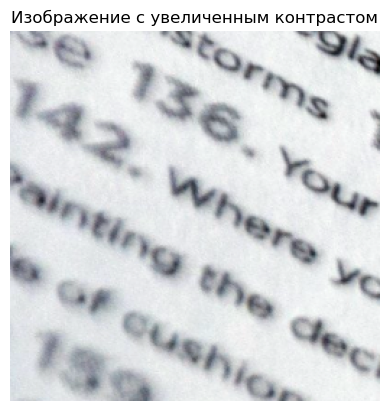

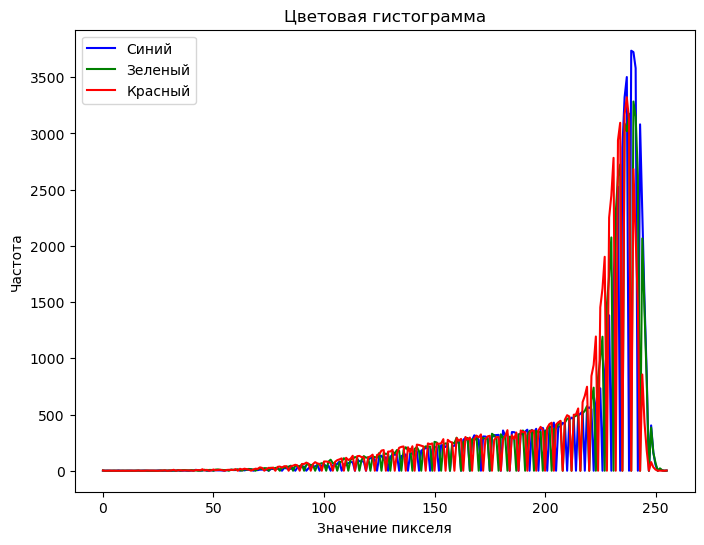

In [42]:
# Получение размеров изображения
rows, cols, channels = image_2.shape

# Перевод изображения в RGB формат
image_2_rgb = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

# Увеличение контраста
alfa = 1.1

# Преобразование во float
if image_2_rgb.dtype == np.uint8:
    contr_image = image_2_rgb.astype(np.float32) / 255
else:
    contr_image = image_2_rgb

# Разделение на каналы
image_BGR = cv2.split(contr_image)

# Применение контраста к каждому каналу
contr_image_BGR = []
for layer in image_BGR:
    im_min = layer.min()
    im_max = layer.max()
    image_new_layer = np.clip((((layer - im_min) / (im_max - im_min)) ** alfa), 0, 1)
    contr_image_BGR.append(image_new_layer)

# Объединение каналов
contr_image = cv2.merge(contr_image_BGR)

# Преобразование обратно в uint
if image_2_rgb.dtype == np.uint8:
    contr_image = (255 * contr_image).clip(0, 255).astype(np.uint8)

# Визуализация обработанного изображения
plt.figure()
plt.imshow(cv2.cvtColor(contr_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Изображение с увеличенным контрастом')
plt.show()

# Построение гистограммы после изменения контраста
make_histogram(contr_image)

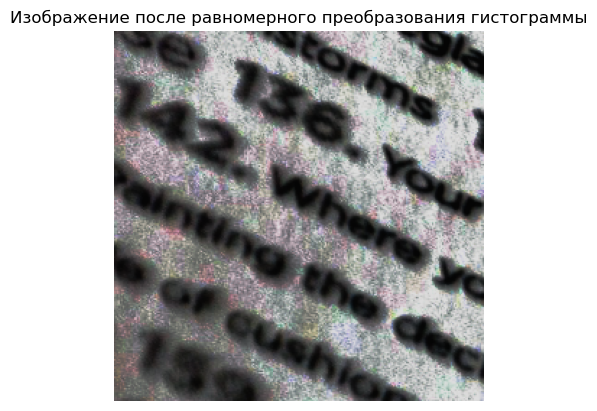

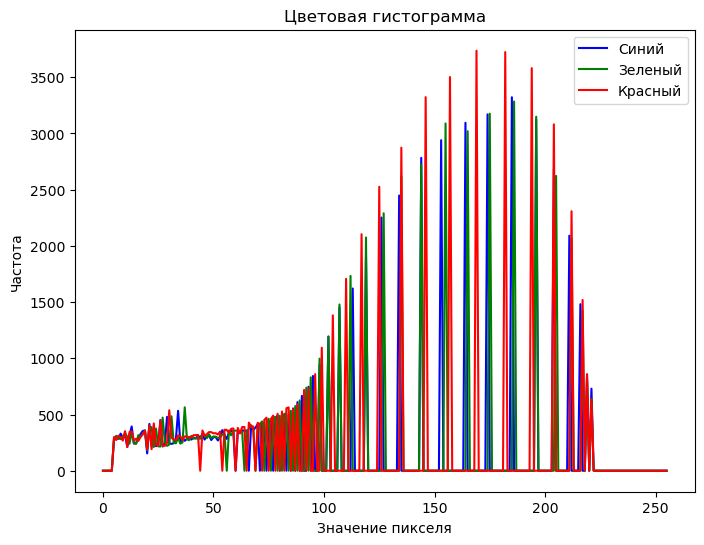

In [43]:
# Равномерное преобразование гистограммы
hist_size = 256
hist_range = (0, 256)

image_BGR = cv2.split(image_2)
b_hist = cv2.calcHist([image_BGR[0]], [0], None, [hist_size], hist_range)
g_hist = cv2.calcHist([image_BGR[1]], [0], None, [hist_size], hist_range)
r_hist = cv2.calcHist([image_BGR[2]], [0], None, [hist_size], hist_range)

CH_b = np.cumsum(b_hist) / (rows * cols)
CH_g = np.cumsum(g_hist) / (rows * cols)
CH_r = np.cumsum(r_hist) / (rows * cols)
image_new1 = np.zeros((rows, cols, 3), dtype=np.uint8)

for i in range(rows):
    for j in range(cols):
        image_new1[i, j, 0] = ((np.max(image_2) - np.min(image)) * CH_b[image[i, j, 0]] + np.min(image)).astype(np.uint8)
        image_new1[i, j, 1] = ((np.max(image) - np.min(image)) * CH_g[image[i, j, 1]] + np.min(image)).astype(np.uint8)
        image_new1[i, j, 2] = ((np.max(image) - np.min(image)) * CH_r[image[i, j, 2]] + np.min(image)).astype(np.uint8)

# Визуализация обработанного изображения
plt.figure()
plt.imshow(cv2.cvtColor(image_new1, cv2.COLOR_BGR2RGB))
plt.title('Изображение после равномерного преобразования гистограммы')
plt.axis('off')
plt.show()

# Построение гистограммы после равномерного преобразования гистограммы
make_histogram(image_new1)

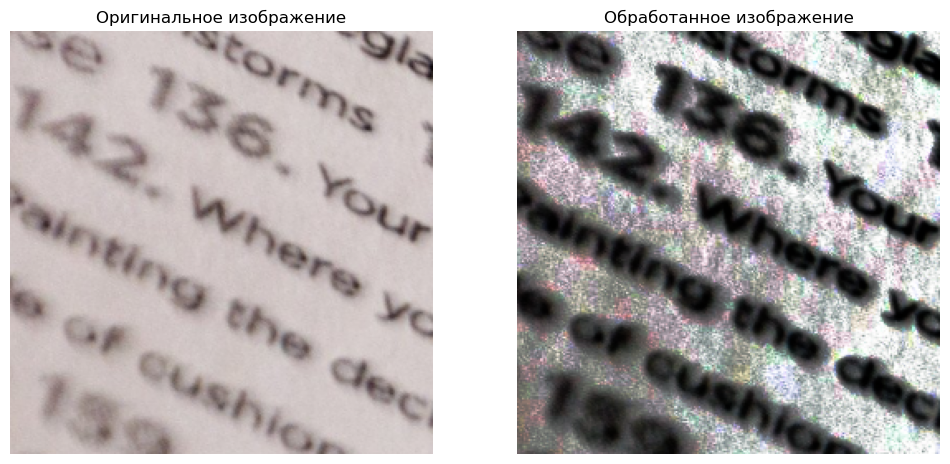

In [44]:
# Функция для сравнения изображений
def compare_images(image, processed_image):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Оригинальное изображение')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
    plt.title('Обработанное изображение')
    plt.axis('off')
    plt.show()

# Использование встроенной функции equalizeHist
b, g, r = cv2.split(image)
b_equalized = cv2.equalizeHist(b)
g_equalized = cv2.equalizeHist(g)
r_equalized = cv2.equalizeHist(r)
equalized_image = cv2.merge([b_equalized, g_equalized, r_equalized])
compare_images(image, equalized_image)

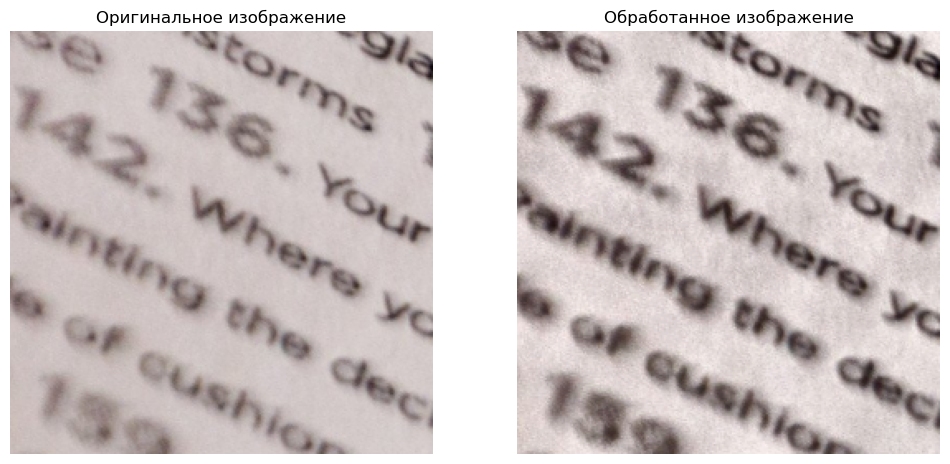

In [45]:
# Использование встроенной функции createCLAHE
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
l_channel, a_channel, b_channel = cv2.split(lab_image)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
l_channel_clahe = clahe.apply(l_channel)
clahe_image = cv2.merge([l_channel_clahe, a_channel, b_channel])
clahe_image = cv2.cvtColor(clahe_image, cv2.COLOR_LAB2BGR)
compare_images(image, clahe_image)

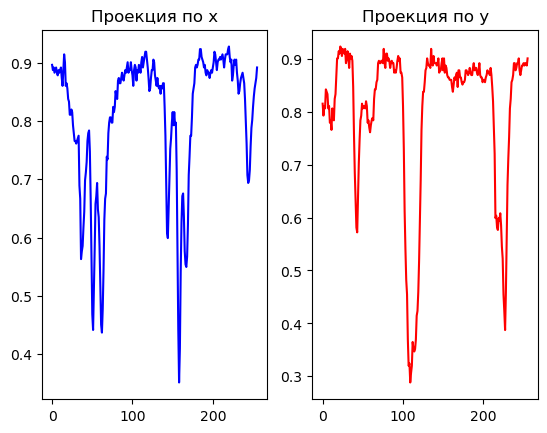

In [51]:
# Профили (графики проекций)
profile = image[round(image_1.shape[0]/2), :] / np.max(image)
profile_y = image[:, round(image_1.shape[0]/2)] / np.max(image)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(profile[:, 0], color='blue')
plt.title('Проекция по x')
    
plt.subplot(1, 2, 2)
plt.plot(profile_y[:, 0], color='red')
plt.title('Проекция по y')

plt.show()

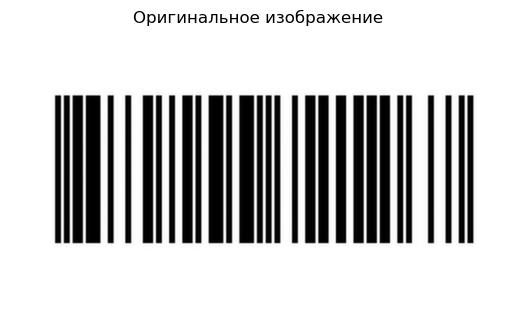

In [48]:
# Загрузка и отображение изображения shtrih.jpg
shtrih = cv2.imread("C:\\Users\\vs410\\Downloads\\shtrih.jpg")
plt.imshow(cv2.cvtColor(shtrih, cv2.COLOR_BGR2RGB))
plt.title('Оригинальное изображение')
plt.axis('off')
plt.show()

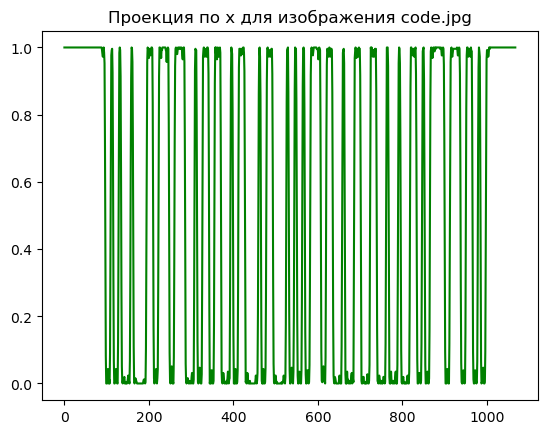

In [49]:
# Проекция для изображения code.jpg
profile_shtrih = shtrih[round(shtrih.shape[0]/2), :] / np.max(shtrih)
plt.figure()
plt.plot(profile_shtrih[:, 0], color='green')
plt.title('Проекция по x для изображения code.jpg')
plt.show()